# General Algorithmic Confusion Analysis
Section 2.3 in the paper

## Metrics
Important points: 
- We measure correlation between leakage and the selection function, which uses both the key and the ct/pt pair
    - For DPA, our correlation is the difference of means: ($ \frac{\sum \mathtt{L}_{V=0}}{N_{V=1}} - \frac{\sum \mathtt{L}_{V=0}}{N_{V=0}}$)
    - For CPA, it is the Pearson correlation. ($\frac{E\{[V - E(V)][\mathtt{L} - E(\mathtt{L})]\}}{\sqrt{D(V)}\sqrt{D(\mathtt{L})}}$)

## Selection function
The selection function of DPA in our case is simply the first output bit of the first s-box, whereas for CPA it is all bits of the first s-box output (defined as the first h bits in the paper, but h is simply equal to the length of the output.)
## Goal
We want to define the characteristic confusion values of the DES S-boxes. Confusion values define what the correlation is between the input and the output - for example, a confusion coefficient of 1 means that the output strongly implies the input, making key reversal trivial.

In the paper, they define the confusion coefficients for DPA as using the first bit of the first s-box to determine how the key diffuses into the output. For CPA, it is defined as the full output of the first S-box in DES.

The confusion analysis os computed using the key pairs, for which there are $\frac{2^6 - (2^6-1)}{2}$ pairs, since we only care about unique pairs $k_i, k_j$ where $k_i \neq k_j$

It is unclear how the CPA confusion analysis is conducted, because the pearson correlation between 2 keys does not produce the correct result, nor does naively computing V|ki - V|kj using hamming weights or any similar metric. 
They claim that the selection function for V in CPA is an h-bit subset of d with value up to h.

[compute_confusion_coefficients] Setup complete!
Mean confusion: 0.5079365079365079
Min confusion: 0.25
Max confusion: 0.75
All distinct values: [np.float64(0.25), np.float64(0.3125), np.float64(0.375), np.float64(0.4375), np.float64(0.5), np.float64(0.5625), np.float64(0.625), np.float64(0.6875), np.float64(0.75)]
[compute_confusion_coefficients] Setup complete!
Mean confusion: 2.0317460317460316
Min confusion: 1.1875
Max confusion: 2.9375
All distinct values: [np.float64(1.1875), np.float64(1.375), np.float64(1.4375), np.float64(1.5), np.float64(1.5625), np.float64(1.625), np.float64(1.6875), np.float64(1.75), np.float64(1.8125), np.float64(1.875), np.float64(1.9375), np.float64(2.0), np.float64(2.1875), np.float64(2.25), np.float64(2.3125), np.float64(2.375), np.float64(2.4375), np.float64(2.5), np.float64(2.5625), np.float64(2.625), np.float64(2.6875), np.float64(2.75), np.float64(2.875), np.float64(2.9375)]


Text(0.5, 1.0, 'Distribution of Confusion Coefficients')

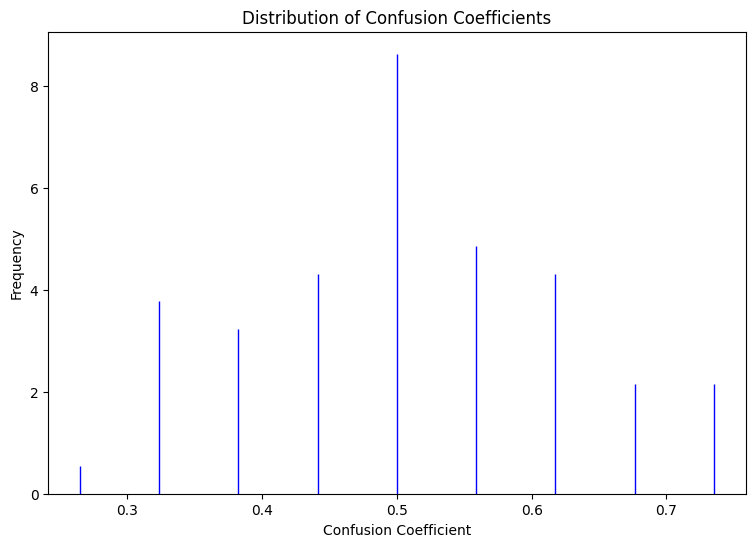

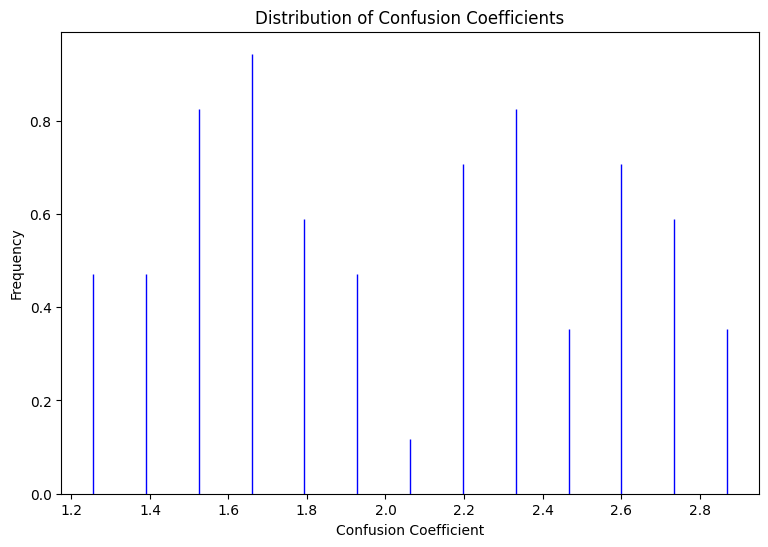

In [2]:
# DEFINITIONS
import analysis_functions as af
import numpy as np
import matplotlib.pyplot as plt

dpa_output = af.compute_confusion_coefficients(af.DES_Sboxes[0], 'DPA', 'DES')
print(f"Mean confusion: {np.mean(dpa_output)}")
print(f"Min confusion: {np.min(dpa_output)}")
print(f"Max confusion: {np.max(dpa_output)}")

print(f"All distinct values: {sorted(set(dpa_output))}") # Simple way to get all unique values

# Generate the figure
_, ax = plt.subplots(figsize=(9, 6))
ax.hist(dpa_output, rwidth=0, bins='auto', edgecolor='blue', alpha=1, density=True)

ax.set_xlabel('Confusion Coefficient')
ax.xaxis.limit_range_for_scale(0.2, 0.8)
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Confusion Coefficients for DPA (DES)')

# This comes out incorrect...
cpa_output = af.compute_confusion_coefficients(af.DES_Sboxes[0], 'CPA', 'DES')
print(f"Mean confusion: {np.mean(cpa_output)}")
print(f"Min confusion: {np.min(cpa_output)}")
print(f"Max confusion: {np.max(cpa_output)}")

print(f"All distinct values: {sorted(set(cpa_output))}") # Simple way to get all unique values

_, ax2 = plt.subplots(figsize=(9, 6))
ax2.hist(cpa_output, rwidth=0, bins='auto', edgecolor='blue', alpha=1, density=True)
ax2.set_xlabel('Confusion Coefficient')
ax2.xaxis.limit_range_for_scale(1.1, 3)
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Confusion Coefficients for CPA (DES)')

# Result
The first figure (for DPA) matches exactly, however the second figure, generated using the CPA select function, does not resemble the equivalent in the paper. Based on the description given in the paper, I was unable to find any inconsistencies in our methodology compared to theirs.

# AES
We want to try to recreate their figures for AES confusion coefficients as well.

[compute_confusion_coefficients] Setup complete!
Mean confusion: 0.5006917317708334
Min confusion: 0.0
Max confusion: 0.62109375
All distinct values: [np.float64(0.0), np.float64(0.34765625), np.float64(0.3671875), np.float64(0.37109375), np.float64(0.375), np.float64(0.37890625), np.float64(0.38671875), np.float64(0.390625), np.float64(0.39453125), np.float64(0.3984375), np.float64(0.40234375), np.float64(0.40625), np.float64(0.41015625), np.float64(0.4140625), np.float64(0.41796875), np.float64(0.421875), np.float64(0.42578125), np.float64(0.4296875), np.float64(0.43359375), np.float64(0.4375), np.float64(0.44140625), np.float64(0.4453125), np.float64(0.44921875), np.float64(0.453125), np.float64(0.45703125), np.float64(0.4609375), np.float64(0.46484375), np.float64(0.46875), np.float64(0.47265625), np.float64(0.4765625), np.float64(0.48046875), np.float64(0.484375), np.float64(0.48828125), np.float64(0.4921875), np.float64(0.49609375), np.float64(0.5), np.float64(0.50390625), np.flo

Text(0.5, 1.0, 'Distribution of Confusion Coefficients for CPA (DES)')

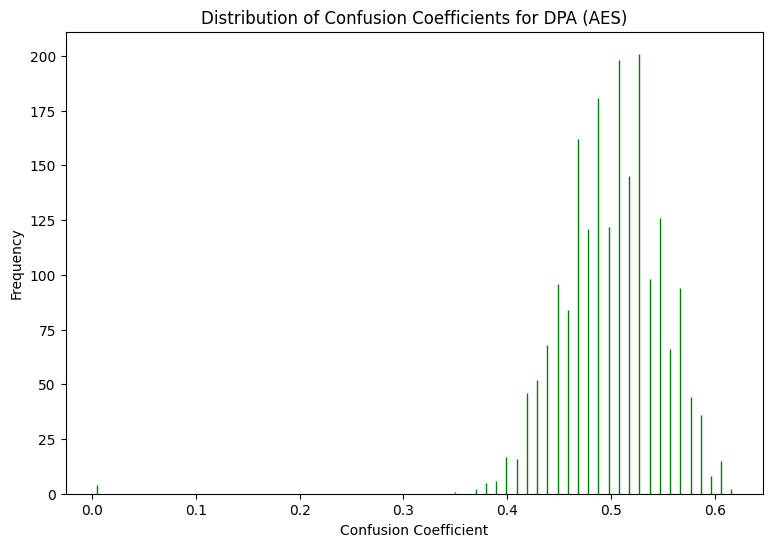

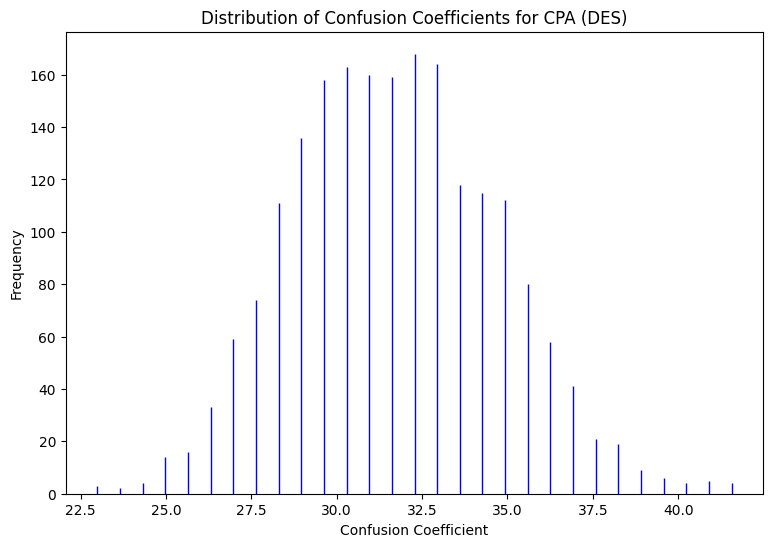

In [3]:
import analysis_functions as af
import numpy as np
import matplotlib.pyplot as plt

dpa_output_aes = af.compute_confusion_coefficients(None, 'DPA', 'AES')
print(f"Mean confusion: {np.mean(dpa_output_aes)}")
print(f"Min confusion: {np.min(dpa_output_aes)}")
print(f"Max confusion: {np.max(dpa_output_aes)}")

print(f"All distinct values: {sorted(set(dpa_output_aes))}") # Simple way to get all unique values

# Generate the figure
_, ax3 = plt.subplots(figsize=(9, 6))
ax3.hist(dpa_output_aes, rwidth=0, bins='auto', edgecolor='blue', alpha=1, density=True)

ax3.set_xlabel('Confusion Coefficient')
ax3.xaxis.limit_range_for_scale(0.2, 0.8)
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Confusion Coefficients for DPA (AES)')

# This comes out incorrect...
cpa_output_aes = af.compute_confusion_coefficients(None, 'CPA', 'AES')
print(f"Mean confusion: {np.mean(cpa_output_aes)}")
print(f"Min confusion: {np.min(cpa_output_aes)}")
print(f"Max confusion: {np.max(cpa_output_aes)}")

print(f"All distinct values: {sorted(set(cpa_output_aes))}") # Simple way to get all unique values

_, ax4 = plt.subplots(figsize=(9, 6))
ax4.hist(cpa_output_aes, rwidth=0, bins='auto', edgecolor='blue', alpha=1, density=True)
ax4.set_xlabel('Confusion Coefficient')
ax4.xaxis.limit_range_for_scale(1.1, 3)
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of Confusion Coefficients for CPA (AES)')

# Results
Since the AES S-Box is 256x256, it is computationally infeasible to test the every combination/key state. Due to this, we took the approach of instead generating 2^16 sample states and checking the confusion coefficients with a subset of the key space. This approach is certainly not exhaustive obviously, but will hopefully serve to still demonstrate that the resultant values are much closer together than with DES.

Their figures for CPA don't make much sense, though, if hamming weight is the select function, as the confusion coefficient should be distributed about 64 (128/2) since the state and key size are related to 128 bits.

Indeed, in our 

# Insights
